# **Day 4/5**: Python Training

The objective of this notebook is to cover some important concepts which we came across during our day 4 of the python training session. In this notebook, we will quickly cover few important concepts mostly around the 4 mostly used modules for data science related projects in python namely - pandas, numpy, matplotlib, plotly

Refer to the outline of this notebook below to browse through different sections of this notebook.  

## **Table of Contents**  
* [Pandas](#pandas)  
    * [Pandas Installation](#pandas-installation)  
    * [Pandas Usage](#pandas-usage)  
        * [Pandas Object Creation](#pandas-object-creation)  
        * [Pandas Viewing Data](#pandas-viewing-data)  
        * [Pandas Selection](#pandas-selection)  
        * [Pandas Missing Data](#pandas-missing-data)  
        * [Pandas Operations](#pandas-operations)  
        * [Pandas Merge](#pandas-merge)  
        * [Pandas Grouping](#pandas-grouping)  
        * [Pandas Reshaping](#pandas-reshaping)
        * [Pandas Categoricals](#pandas-categoricals)
        * [Pandas Plotting](#pandas-plotting)
* [Numpy](#numpy)  
    * [Numpy Installation](#numpy-installation)  
    * [Numpy Usage](#numpy-usage)  
        * [Numpy Array Creation](#numpy-array-creation)  
        * [Numpy Printing Array](#numpy-printing-array)  
        * [Numpy Operations](#numpy-operations)  
        * [Numpy Universal Functions](#numpy-universal-functions)
        * [Numpy Plotting](#numpy-plotting)
* [Matplotlib](#matplotlib)
    * [Matplotlib Installation](#matplotlib-installation)  
    * [Matplotlib Usage](#matplotlib-usage)  
        * [Matplotlib Basic Types](#matplotlib-basics-types)  
        * [Matplotlib Plotting Arrays](#matplotlib-plotting-arrays)  
        * [Matplotlib Statistical Plots](#matplotlib-statistical-plots)  
        * [Matplotlib Unstructured Corodinates](matplotlib-unstructured-coordinates)  
        * [Matplotlib 3D Plots](#matplotlib-3d-plots)
* [Plotly](#plotly)
    * [Plotly Installation](#plotly-installation)  
    * [Plotly Usage](#plotly-usage)

## **Pandas**

[Back to contents](#table-of-contents)

### Pandas Installation

In [1]:
%pip install pandas==1.5.3


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Pandas Usage  

10 minutes to Pandas Official Link - [Link](https://pandas.pydata.org/pandas-docs/version/1.4/pandas.pdf)  
Pandas Cookbook - [Link](https://pandas.pydata.org/pandas-docs/version/1.4/pandas.pdf#page=1001&zoom=100,96,657)

In [2]:
import pandas as pd
import numpy as np

#### Pandas Object Creation   

[Back to contents](#table-of-contents)

In [3]:
"""
Pandas have 2 data structures - 1. Series, and 2. Dataframes
Series are 1 dimensional datastruture capable of holding any data type (integers, strings, floats, etc)
Dataframes are 2 dimensional datastructure with columns of potentially different data types or dict of Series objects.
"""
 
# Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
# Dataframe with same data type
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-1.841341,0.085622,-1.188178,-0.289308
2013-01-02,1.919428,-2.392444,-0.304149,-1.450468
2013-01-03,-0.712382,1.305992,0.188410,-0.090109
2013-01-04,0.083039,-0.806577,0.755212,-0.705250
2013-01-05,-0.385408,-0.282160,-0.849037,-0.926457
2013-01-06,-0.588145,-0.230041,-0.889748,0.539765


In [6]:
# Dataframe with different data types
df2 = pd.DataFrame(
    {
    "A": 1.0,
    "B": pd.Timestamp("20130102"),
    "C": pd.Series(1, index=list(range(4)), dtype="float32"),
    "D": np.array([3] * 4, dtype="int32"),
    "E": pd.Categorical(["test", "train", "test", "train"]),
    "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
# Extracting data types for each column of dataframe
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

#### Pandas Viewing Data

[Back to contents](#table-of-contents)

In [8]:
# Viewing first 5 rows of the dataframe
df.head()

,A,B,C,D
2013-01-01,-1.841341,0.085622,-1.188178,-0.289308
2013-01-02,1.919428,-2.392444,-0.304149,-1.450468
2013-01-03,-0.712382,1.305992,0.188410,-0.090109
2013-01-04,0.083039,-0.806577,0.755212,-0.705250
2013-01-05,-0.385408,-0.282160,-0.849037,-0.926457


In [9]:
# Viewing last 5 rows of the dataframe
df.tail()

,A,B,C,D
2013-01-02,1.919428,-2.392444,-0.304149,-1.450468
2013-01-03,-0.712382,1.305992,0.188410,-0.090109
2013-01-04,0.083039,-0.806577,0.755212,-0.705250
2013-01-05,-0.385408,-0.282160,-0.849037,-0.926457
2013-01-06,-0.588145,-0.230041,-0.889748,0.539765


In [10]:
# Viewing indexes for the dataframe
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
# Viewing columns of the dataframe
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
# Converting dataframe to numpy array
df.to_numpy()

array([[-1.84134107,  0.08562194, -1.18817786, -0.28930825],
       [ 1.91942759, -2.39244362, -0.30414934, -1.45046783],
       [-0.71238161,  1.30599244,  0.18840958, -0.09010881],
       [ 0.0830389 , -0.806577  ,  0.75521211, -0.70524986],
       [-0.3854083 , -0.28215964, -0.84903672, -0.92645735],
       [-0.5881448 , -0.23004088, -0.889748  ,  0.5397647 ]])

In [13]:
# Extracting Statistics for each column of the dataframe
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.254135,-0.386601,-0.381248,-0.486971
std,1.240651,1.210212,0.741691,0.695683
min,-1.841341,-2.392444,-1.188178,-1.450468
25%,-0.681322,-0.675473,-0.879570,-0.871155
50%,-0.486777,-0.256100,-0.576593,-0.497279
75%,-0.034073,0.006706,0.065270,-0.139909
max,1.919428,1.305992,0.755212,0.539765


In [14]:
# Transposing a dataframe
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.841341,1.919428,-0.712382,0.083039,-0.385408,-0.588145
B,0.085622,-2.392444,1.305992,-0.806577,-0.282160,-0.230041
C,-1.188178,-0.304149,0.188410,0.755212,-0.849037,-0.889748
D,-0.289308,-1.450468,-0.090109,-0.705250,-0.926457,0.539765


In [15]:
# Sorting a dataframe by index values
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.289308,-1.188178,0.085622,-1.841341
2013-01-02,-1.450468,-0.304149,-2.392444,1.919428
2013-01-03,-0.090109,0.188410,1.305992,-0.712382
2013-01-04,-0.705250,0.755212,-0.806577,0.083039
2013-01-05,-0.926457,-0.849037,-0.282160,-0.385408
2013-01-06,0.539765,-0.889748,-0.230041,-0.588145


In [16]:
# Sorting a dataframe by column values
df.sort_values(by="B")

,A,B,C,D
2013-01-02,1.919428,-2.392444,-0.304149,-1.450468
2013-01-04,0.083039,-0.806577,0.755212,-0.705250
2013-01-05,-0.385408,-0.282160,-0.849037,-0.926457
2013-01-06,-0.588145,-0.230041,-0.889748,0.539765
2013-01-01,-1.841341,0.085622,-1.188178,-0.289308
2013-01-03,-0.712382,1.305992,0.188410,-0.090109


#### Pandas Selection

[Back to contents](#table-of-contents)

In [17]:
# Selecting a specific column by label name
df['A']

2013-01-01   -1.841341
2013-01-02    1.919428
2013-01-03   -0.712382
2013-01-04    0.083039
2013-01-05   -0.385408
2013-01-06   -0.588145
Freq: D, Name: A, dtype: float64

In [18]:
# Selecting dataframe rows by indexes
df[3:5]

,A,B,C,D
2013-01-04,0.083039,-0.806577,0.755212,-0.705250
2013-01-05,-0.385408,-0.282160,-0.849037,-0.926457


In [19]:
# Selecting dataframe rows by index value
df.loc[dates[0]]

A   -1.841341
B    0.085622
C   -1.188178
D   -0.289308
Name: 2013-01-01 00:00:00, dtype: float64

In [20]:
# Selecting dataframe rows by row and column indices
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.083039,-0.806577
2013-01-05,-0.385408,-0.282160


In [21]:
# Selecting dataframe rows by row and column indices in list format
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,1.919428,-0.304149
2013-01-03,-0.712382,0.188410
2013-01-05,-0.385408,-0.849037


In [22]:
# Selecting a specific cell value
df.iloc[1, 1]

-2.3924436211313034

In [23]:
# Selecting dataframe rows by boolean / conditional indexing
df[df["A"] > 0]

,A,B,C,D
2013-01-02,1.919428,-2.392444,-0.304149,-1.450468
2013-01-04,0.083039,-0.806577,0.755212,-0.705250


In [24]:
# Selecting dataframe values which are greater than zero and eliminating others by replacing
# them with NaN values
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.085622,NaN,NaN
2013-01-02,1.919428,NaN,NaN,NaN
2013-01-03,NaN,1.305992,0.188410,NaN
2013-01-04,0.083039,NaN,0.755212,NaN
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,NaN,NaN,NaN,0.539765


In [25]:
# Selecting specific dataframe rows by specific column values
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-0.712382,1.305992,0.188410,-0.090109,two
2013-01-05,-0.385408,-0.282160,-0.849037,-0.926457,four


#### Pandas Missing Data

[Back to contents](#table-of-contents)

In [26]:
# Adding one extra column with NaN values
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1

,A,B,C,D,E
2013-01-01,-1.841341,0.085622,-1.188178,-0.289308,NaN
2013-01-02,1.919428,-2.392444,-0.304149,-1.450468,NaN
2013-01-03,-0.712382,1.305992,0.188410,-0.090109,NaN
2013-01-04,0.083039,-0.806577,0.755212,-0.705250,NaN


In [27]:
# Replacing two row indices for new column with some value
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,E
2013-01-01,-1.841341,0.085622,-1.188178,-0.289308,1.0
2013-01-02,1.919428,-2.392444,-0.304149,-1.450468,1.0
2013-01-03,-0.712382,1.305992,0.188410,-0.090109,NaN
2013-01-04,0.083039,-0.806577,0.755212,-0.705250,NaN


In [28]:
# Dropping dataframe rows with NaN values in E column
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,-1.841341,0.085622,-1.188178,-0.289308,1.0
2013-01-02,1.919428,-2.392444,-0.304149,-1.450468,1.0


In [29]:
# Filling NaN values with 5 value for E column
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-1.841341,0.085622,-1.188178,-0.289308,1.0
2013-01-02,1.919428,-2.392444,-0.304149,-1.450468,1.0
2013-01-03,-0.712382,1.305992,0.188410,-0.090109,5.0
2013-01-04,0.083039,-0.806577,0.755212,-0.705250,5.0


In [30]:
# Getting positions in dataframe have values == NaN
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


#### Pandas Operations

[Back to contents](#table-of-contents)

In [31]:
# Extracting mean values for all columns in the dataframe
df.mean()

A   -0.254135
B   -0.386601
C   -0.381248
D   -0.486971
dtype: float64

In [32]:
# Squaring one specific column of dataframe using lambda function 
df['C_squared'] = df['C'].apply(lambda x: x*x)
df

,A,B,C,D,C_squared
2013-01-01,-1.841341,0.085622,-1.188178,-0.289308,1.411767
2013-01-02,1.919428,-2.392444,-0.304149,-1.450468,0.092507
2013-01-03,-0.712382,1.305992,0.188410,-0.090109,0.035498
2013-01-04,0.083039,-0.806577,0.755212,-0.705250,0.570345
2013-01-05,-0.385408,-0.282160,-0.849037,-0.926457,0.720863
2013-01-06,-0.588145,-0.230041,-0.889748,0.539765,0.791651


In [33]:
# Creating pandas series with string data types
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [34]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

#### Pandas Merge

[Back to contents](#table-of-contents)

In [35]:
# Generating pandas dataframe for breaking down into fragments
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.104074,1.036532,-0.441495,1.023853
1,-0.460552,0.493671,-1.018758,1.057049
2,0.033857,0.156249,0.284651,-1.548511
3,0.765904,1.984476,-0.629411,1.720415
4,-0.253859,2.028309,0.408450,0.355243
5,0.243105,-0.532065,0.252232,1.740195
6,0.133116,0.929654,0.398090,-0.698660
7,-0.242812,1.528608,0.479599,-0.644693
8,0.359609,-0.136699,0.352790,-0.268930
9,1.246997,0.638255,0.013890,1.679688


In [36]:
# Breaking down above dataframe into list of dataframes
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.104074  1.036532 -0.441495  1.023853
 1 -0.460552  0.493671 -1.018758  1.057049
 2  0.033857  0.156249  0.284651 -1.548511,
           0         1         2         3
 3  0.765904  1.984476 -0.629411  1.720415
 4 -0.253859  2.028309  0.408450  0.355243
 5  0.243105 -0.532065  0.252232  1.740195
 6  0.133116  0.929654  0.398090 -0.698660,
           0         1         2         3
 7 -0.242812  1.528608  0.479599 -0.644693
 8  0.359609 -0.136699  0.352790 -0.268930
 9  1.246997  0.638255  0.013890  1.679688]

In [37]:
# Generating 2 dummy datframes to merge together
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
print(left)
print('\n')
print(right)

   key  lval
0  foo     1
1  foo     2


   key  rval
0  foo     4
1  foo     5


In [38]:
# Performing left join for left dataframe with right dataframe and on column name = 'key'
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


#### Pandas Grouping

[Back to contents](#table-of-contents)

In [39]:
# Generating a dataframe to perform grouping 
df = pd.DataFrame(
    {
    "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
    "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
    "C": np.random.randn(8),
    "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-0.129710,0.062349
1,bar,one,-0.516069,0.508824
2,foo,two,1.087190,-0.401174
3,bar,three,3.338990,1.128728
4,foo,two,-0.097340,0.826012
5,bar,two,0.257617,-0.575259
6,foo,one,0.231352,-0.614491
7,foo,three,1.813030,-0.203285


In [40]:
# Grouping a dataframe and performing aggregations
df.groupby(by='A').agg({'C':'sum', 'D':'mean'})

,C,D
A,,
bar,3.080537,0.354098
foo,2.904522,-0.066118


#### Pandas Reshaping

[Back to contents](#table-of-contents)

In [41]:
tuples = list(
    zip(
    *[
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
    ]
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [42]:
# Generating a multindex dataframe
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -1.816018  0.227728
      two    -0.675244 -0.415360
baz   one     0.545854  0.669328
      two     1.144086 -0.454600
foo   one    -0.316641 -2.150114
      two     0.992831  0.677526
qux   one    -0.394998 -2.013274
      two     0.516387 -0.221762

In [43]:
# Stacking a dataframe based on column names
df2 = df[:4]
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.816018
               B    0.227728
       two     A   -0.675244
               B   -0.415360
baz    one     A    0.545854
               B    0.669328
       two     A    1.144086
               B   -0.454600
dtype: float64

In [44]:
# Unstacking a stacked dataframe
stacked.unstack()

A         B
first second                    
bar   one    -1.816018  0.227728
      two    -0.675244 -0.415360
baz   one     0.545854  0.669328
      two     1.144086 -0.454600

In [45]:
# Unstacking a dataframe based on second index
stacked.unstack(1)

second        one       two
first                      
bar   A -1.816018 -0.675244
      B  0.227728 -0.415360
baz   A  0.545854  1.144086
      B  0.669328 -0.454600

In [46]:
# Unstacking a dataframe based on first index
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.816018  0.545854
       B  0.227728  0.669328
two    A -0.675244  1.144086
       B -0.415360 -0.454600

In [47]:
# Generating a pandas dataframe for pivotting
df = pd.DataFrame(
    {
    "A": ["one", "one", "two", "three"] * 3,
    "B": ["A", "B", "C"] * 4,
    "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
    "D": np.random.randn(12),
    "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,0.733637,-0.973860
1,one,B,foo,-0.448611,0.236902
2,two,C,foo,-0.001562,-0.222600
3,three,A,bar,-1.149027,0.339864
4,one,B,bar,-0.427592,-0.860351
5,one,C,bar,0.566412,0.388684
6,two,A,foo,0.859431,-1.537405
7,three,B,foo,-0.432970,-0.202961
8,one,C,foo,1.631739,1.794979
9,one,A,bar,-0.354654,0.063572


In [48]:
# Performing pivot on the generated dataframe
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.354654  0.733637
      B -0.427592 -0.448611
      C  0.566412  1.631739
three A -1.149027       NaN
      B       NaN -0.432970
      C -0.282201       NaN
two   A       NaN  0.859431
      B  0.387111       NaN
      C       NaN -0.001562

#### Pandas Categoricals

[Back to contents](#table-of-contents)

In [49]:
# Generating a datframe to convert data tye into categorical type
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [50]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

#### Pandas Plotting

[Back to contents](#table-of-contents)

In [51]:
# Generating a time series dataframe for plotting the cumulative sum
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000",periods=1000))
ts = ts.cumsum()
ts

2000-01-01     0.274903
2000-01-02     0.555468
2000-01-03     2.319594
2000-01-04     2.190177
2000-01-05     1.813452
                ...    
2002-09-22    49.857680
2002-09-23    51.072441
2002-09-24    52.639858
2002-09-25    52.462719
2002-09-26    51.794351
Freq: D, Length: 1000, dtype: float64

<AxesSubplot: >

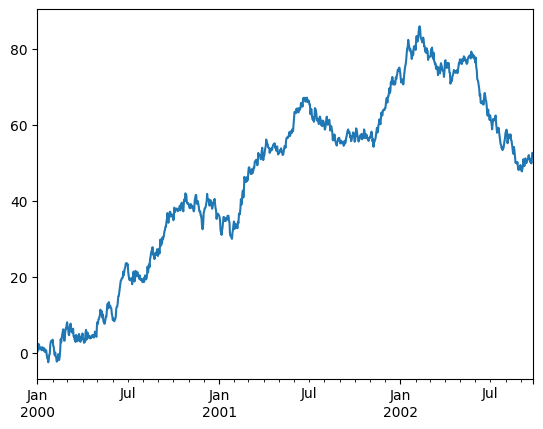

In [52]:
ts.plot()

In [53]:
# Generating a time series dataframe with multiple column labels
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df

,A,B,C,D
2000-01-01,1.444429,-0.301285,1.219896,-0.406515
2000-01-02,0.868896,-0.763641,0.341849,-0.987364
2000-01-03,-0.635145,0.322915,0.042220,-0.410204
2000-01-04,-0.109648,-0.439156,1.404723,-0.015162
2000-01-05,0.383422,2.090755,-0.481494,-0.386887
...,...,...,...,...
2002-09-22,-0.858762,0.079938,3.301453,-3.169363
2002-09-23,0.846292,0.704950,-0.368632,0.847828
2002-09-24,0.539384,-1.288921,0.118267,-0.538444
2002-09-25,0.367807,0.123243,-1.965689,2.009270


In [54]:
df = df.cumsum()

<AxesSubplot: title={'center': 'sales_data_plot'}, xlabel='date_range', ylabel='sales'>

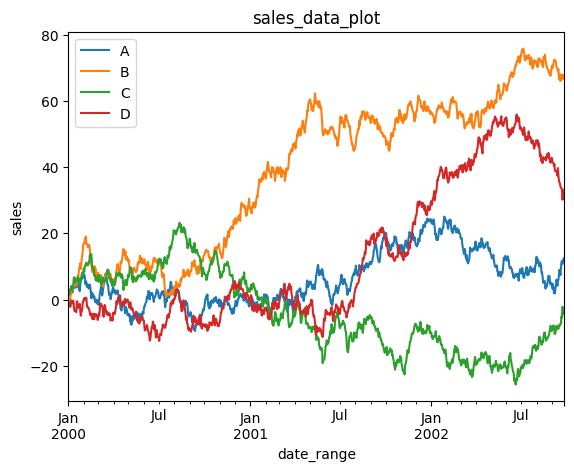

In [55]:
df.plot(xlabel='date_range', ylabel='sales', title='sales_data_plot')

## **Numpy**

[Back to contents](#table-of-contents)

### Numpy Installation

In [56]:
%pip install numpy==1.24.1

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Numpy Usage  

* **Array Creation:**  
    arange, array, copy, empty, empty_like, eye, fromfile, fromfunction,
    identity, linspace, logspace, mgrid, ogrid, ones, ones_like, r, zeros, zeros_like  
* **Conversions:**  
    ndarray.astype, atleast_1d, atleast_2d, atleast_3d, mat
* **Manipulations:**  
    array_split, column_stack, concatenate, diagonal, dsplit, dstack, hsplit,
    hstack, ndarray.item, newaxis, ravel, repeat, reshape, resize, squeeze, swapaxes,
    take, transpose, vsplit, vstack  
* **Questions:**  
    all, any, nonzero, where  
* **Ordering:**  
    argmax, argmin, argsort, max, min, ptp, searchsorted, sort  
* **Operations:**  
    choose, compress, cumprod, cumsum, inner, ndarray.fill, imag, prod, put, putmask,
    real, sum  
* **Basic Statistics:**  
    cov, mean, std, var  
* **Basic Linear Algebra:**  
    cross, dot, outer, linalg.svd, vdot  

Numpy Usage Official Link - [Link](https://numpy.org/doc/1.18/numpy-user.pdf)  


In [57]:
import numpy as np

#### Numpy Array Creation  

[Back to contents](#table-of-contents)

In [58]:
# Generating a numpy array from list of elements
a = np.array([2,3,4])
a

array([2, 3, 4])

In [59]:
# Checking the data type in the numpy array
a.dtype

dtype('int32')

In [60]:
# Generating a numpy array with floating nos data type
b = np.array([(1.5,2,3), (4,5,6)])
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

In [61]:
# Generating a numpy array with complex nos data type
c = np.array([[1,2], [3,4]], dtype=complex )
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

In [62]:
# Generating a 2D - zero filled array of the 3 rows and 4 columns
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [63]:
# Generating a 3D - 1 filled array of the 3 rows and 4 columns
np.ones((2,3,4), dtype=np.int16)

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [64]:
# Generating numpy array with numbers between 0 and 2 for 9 numbers in total
np.linspace(0, 2, 9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

#### Numpy Printing Array

[Back to contents](#table-of-contents)

In [65]:
# Generating a 1D array
a = np.arange(6) 
print(a)

print('\n')

# Generating a 2D array
b = np.arange(12).reshape(4,3)
print(b)

print('\n')

# Generating a 3D array
c = np.arange(24).reshape(2,3,4) 
print(c)

[0 1 2 3 4 5]


[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


#### Numpy Operations

[Back to contents](#table-of-contents)

In [66]:
# All arithmetic operations occur in numpy arrays at element level
a = np.array([20,30,40,50])
b = np.arange(4)

c = a-b
print(c)
print(b**2)
print(10*np.sin(a))
print(a<30)

[20 29 38 47]
[0 1 4 9]
[ 9.12945251 -9.88031624  7.4511316  -2.62374854]
[ True False False False]


In [67]:
# Matrix level opeartions for 2 numpy arrays
A = np.array([[1,1],[0,1]])
B = np.array([[2,0],[3,4]])

print(A*B) # Element wise multiplication of 2 arrays
print(A@B) # Matrix multiplication of 2 arrays
print(A.dot(B)) # Dot product of 2 arrays

[[2 0]
 [0 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


In [68]:
# Other array operations
a = np.random.random((2,3))

print(a.sum())
print(a.min())
print(a.max())

3.723810219662486
0.22356156640609104
0.938642506434691


In [69]:
# Sum of each column
print(a.sum(axis=0))

# Min of each row
print(a.min(axis=1))

# Cumulative sum along each row
print(a.cumsum(axis=1))

[1.09755539 1.7698074  0.85644743]
[0.45600667 0.22356157]
[[0.87399383 1.81263633 2.268643  ]
 [0.22356157 1.05472646 1.45516722]]


#### Numpy Universal Functions  

List of functions:  
**all, any, apply_along_axis, argmax, argmin, argsort, average, bincount, ceil, clip, conj,
corrcoef, cov, cross, cumprod, cumsum, diff, dot, floor, inner, inv, lexsort, max, maximum,
mean, median, min, minimum, nonzero, outer, prod, re, round, sort, std, sum, trace, transpose,
var, vdot, vectorize, where**

[Back to contents](#table-of-contents)

In [70]:
A = np.arange(3)
A

array([0, 1, 2])

In [71]:
# Perform exponential for each element in the array
np.exp(A)

array([1.        , 2.71828183, 7.3890561 ])

In [72]:
# Perform sq root for each element in the array
np.sqrt(A)

array([0.        , 1.        , 1.41421356])

In [73]:
C = np.array([2., -1., 4.])
np.add(A, C)

array([2., 0., 6.])

#### Numpy Indexing, Slicing & Iterating

[Back to contents](#table-of-contents)

In [74]:
# Generating a numpy array where each element if cubed again
a = np.arange(10)**3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729], dtype=int32)

In [75]:
print(a[2]) # Getting an element in specific index
print(a[2:5]) # Getting a sub array by using index range
a[0:6:2] = 10000 # Replacing array values at 0, 2, 4 places to 10000
print(a)

8
[ 8 27 64]
[10000     1 10000    27 10000   125   216   343   512   729]


In [76]:
# Looping across elements in an array
for element in np.arange(10):
    print(element)

0
1
2
3
4
5
6
7
8
9


#### Numpy Shape Manipulation

[Back to contents](#table-of-contents)

In [77]:
# Generating a random array for shape manipulation
a = np.floor(10*np.random.random((3,4)))
a

array([[7., 9., 6., 5.],
       [1., 7., 4., 0.],
       [9., 3., 7., 7.]])

In [78]:
print(a.shape) # Prints the shape of the array i.e. no of rows, no  of columns (dimensions)
print(a.ravel()) # Prints the flattened array
print(a.reshape(6,2)) # Reshapes the array to newer dimensions
print(a.T) # Transposing an array
a.resize((6,2)) # Resize and Reshape are same but resize modifies the array permanently
print(a)

(3, 4)
[7. 9. 6. 5. 1. 7. 4. 0. 9. 3. 7. 7.]
[[7. 9.]
 [6. 5.]
 [1. 7.]
 [4. 0.]
 [9. 3.]
 [7. 7.]]
[[7. 1. 9.]
 [9. 7. 3.]
 [6. 4. 7.]
 [5. 0. 7.]]
[[7. 9.]
 [6. 5.]
 [1. 7.]
 [4. 0.]
 [9. 3.]
 [7. 7.]]


In [79]:
# Array Stacking (Vertical and Horizontal Stacking)
a = np.floor(10*np.random.random((2,2)))
b = np.floor(10*np.random.random((2,2)))
print(a)
print(b)

[[7. 9.]
 [7. 4.]]
[[4. 5.]
 [1. 2.]]


In [80]:
print(np.vstack((a,b))) # Vertical Stack one array on another
print(np.hstack((a,b))) # Horizontal Stack one array on another

[[7. 9.]
 [7. 4.]
 [4. 5.]
 [1. 2.]]
[[7. 9. 4. 5.]
 [7. 4. 1. 2.]]


In [81]:
# Array Splitting (Vertical and Horizontal Splitting)
a = np.floor(10*np.random.random((2,12)))
a

array([[4., 5., 6., 8., 4., 8., 9., 1., 2., 1., 6., 7.],
       [4., 5., 7., 7., 7., 0., 0., 6., 5., 9., 3., 6.]])

In [82]:
print(np.hsplit(a,3)) # Splitting into multiple vertical arrays

[array([[4., 5., 6., 8.],
       [4., 5., 7., 7.]]), array([[4., 8., 9., 1.],
       [7., 0., 0., 6.]]), array([[2., 1., 6., 7.],
       [5., 9., 3., 6.]])]


#### Numpy Plotting  

[Back to contents](#table-of-contents)

In [83]:
import matplotlib.pyplot as plt

In [84]:
def mandelbrot( h,w, maxit=20 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x  = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2 # who is diverging
        div_now = diverge & (divtime==maxit) # who is diverging now
        divtime[div_now] = i # note when
        z[diverge] = 2 # avoid diverging too much

    return divtime

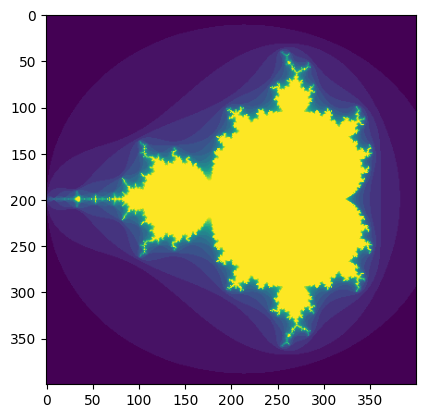

In [85]:
plt.imshow(mandelbrot(400,400))
plt.show()

## **Matplotlib**

[Back to contents](#table-of-contents)

### Matplotlib Installation

In [86]:
%pip install matplotlib==3.6.3


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Matplotlib Usage  

Matplotlib Usage Official Link - [Link](https://matplotlib.org/2.0.2/Matplotlib.pdf)  

![image.png](assets/matplotlib_figure.jpg)

#### Matplotlib Basic Types

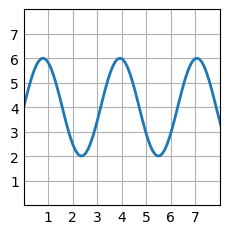

In [87]:
# Line chart

plt.style.use('_mpl-gallery')

# make data
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

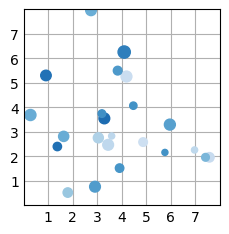

In [88]:
plt.style.use('_mpl-gallery')

# make the data
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

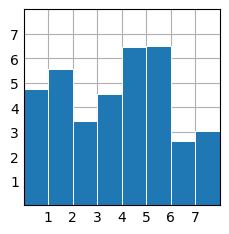

In [89]:
# Bar Chart

plt.style.use('_mpl-gallery')

# make data:
np.random.seed(3)
x = 0.5 + np.arange(8)
y = np.random.uniform(2, 7, len(x))

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

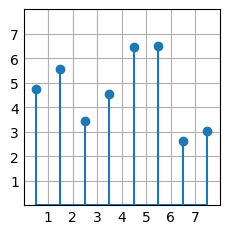

In [90]:
# Stem Chart

plt.style.use('_mpl-gallery')

# make data
np.random.seed(3)
x = 0.5 + np.arange(8)
y = np.random.uniform(2, 7, len(x))

# plot
fig, ax = plt.subplots()

ax.stem(x, y)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

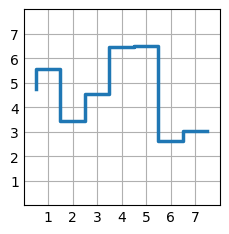

In [91]:
# Step Chart

plt.style.use('_mpl-gallery')

# make data
np.random.seed(3)
x = 0.5 + np.arange(8)
y = np.random.uniform(2, 7, len(x))

# plot
fig, ax = plt.subplots()

ax.step(x, y, linewidth=2.5)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

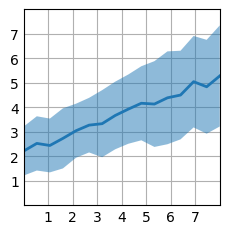

In [92]:
# Fill Between Chart

plt.style.use('_mpl-gallery')

# make data
np.random.seed(1)
x = np.linspace(0, 8, 16)
y1 = 3 + 4*x/8 + np.random.uniform(0.0, 0.5, len(x))
y2 = 1 + 2*x/8 + np.random.uniform(0.0, 0.5, len(x))

# plot
fig, ax = plt.subplots()

ax.fill_between(x, y1, y2, alpha=.5, linewidth=0)
ax.plot(x, (y1 + y2)/2, linewidth=2)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

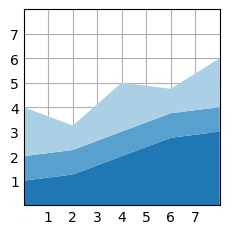

In [93]:
# Stack Plot

plt.style.use('_mpl-gallery')

# make data
x = np.arange(0, 10, 2)
ay = [1, 1.25, 2, 2.75, 3]
by = [1, 1, 1, 1, 1]
cy = [2, 1, 2, 1, 2]
y = np.vstack([ay, by, cy])

# plot
fig, ax = plt.subplots()

ax.stackplot(x, y)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

#### Matplotlib Plotting Arrays  

Plotting of z functions which is dependent variable for x,y

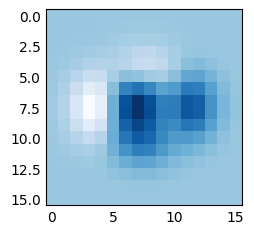

In [94]:
# Imshow plot

plt.style.use('_mpl-gallery-nogrid')

# make data
X, Y = np.meshgrid(np.linspace(-3, 3, 16), np.linspace(-3, 3, 16))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

# plot
fig, ax = plt.subplots()

ax.imshow(Z)

plt.show()

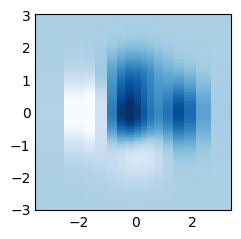

In [95]:
# Pcolormesh plot

plt.style.use('_mpl-gallery-nogrid')

# make data with uneven sampling in x
x = [-3, -2, -1.6, -1.2, -.8, -.5, -.2, .1, .3, .5, .8, 1.1, 1.5, 1.9, 2.3, 3]
X, Y = np.meshgrid(x, np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

# plot
fig, ax = plt.subplots()

ax.pcolormesh(X, Y, Z, vmin=-0.5, vmax=1.0)

plt.show()

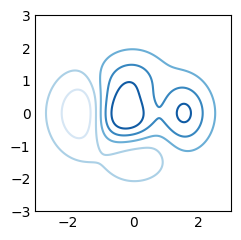

In [96]:
# Contour

plt.style.use('_mpl-gallery-nogrid')

# make data
X, Y = np.meshgrid(np.linspace(-3, 3, 256), np.linspace(-3, 3, 256))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)
levels = np.linspace(np.min(Z), np.max(Z), 7)

# plot
fig, ax = plt.subplots()

ax.contour(X, Y, Z, levels=levels)

plt.show()

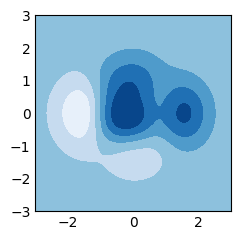

In [97]:
# Contourf

plt.style.use('_mpl-gallery-nogrid')

# make data
X, Y = np.meshgrid(np.linspace(-3, 3, 256), np.linspace(-3, 3, 256))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)
levels = np.linspace(Z.min(), Z.max(), 7)

# plot
fig, ax = plt.subplots()

ax.contourf(X, Y, Z, levels=levels)

plt.show()

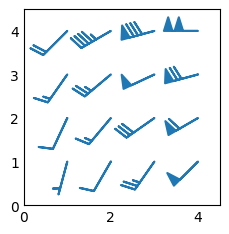

In [98]:
# Barbs plot

plt.style.use('_mpl-gallery-nogrid')

# make data:
X, Y = np.meshgrid([1, 2, 3, 4], [1, 2, 3, 4])
angle = np.pi / 180 * np.array([[15., 30, 35, 45],
                                [25., 40, 55, 60],
                                [35., 50, 65, 75],
                                [45., 60, 75, 90]])
amplitude = np.array([[5, 10, 25, 50],
                      [10, 15, 30, 60],
                      [15, 26, 50, 70],
                      [20, 45, 80, 100]])
U = amplitude * np.sin(angle)
V = amplitude * np.cos(angle)

# plot:
fig, ax = plt.subplots()

ax.barbs(X, Y, U, V, barbcolor='C0', flagcolor='C0', length=7, linewidth=1.5)

ax.set(xlim=(0, 4.5), ylim=(0, 4.5))

plt.show()

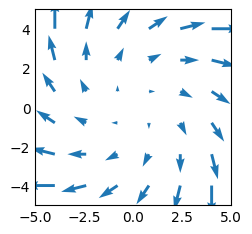

In [99]:
# Quiver plot

plt.style.use('_mpl-gallery-nogrid')

# make data
x = np.linspace(-4, 4, 6)
y = np.linspace(-4, 4, 6)
X, Y = np.meshgrid(x, y)
U = X + Y
V = Y - X

# plot
fig, ax = plt.subplots()

ax.quiver(X, Y, U, V, color="C0", angles='xy',
          scale_units='xy', scale=5, width=.015)

ax.set(xlim=(-5, 5), ylim=(-5, 5))

plt.show()

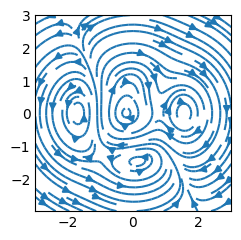

In [100]:
# Stream plot

plt.style.use('_mpl-gallery-nogrid')

# make a stream function:
X, Y = np.meshgrid(np.linspace(-3, 3, 256), np.linspace(-3, 3, 256))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)
# make U and V out of the streamfunction:
V = np.diff(Z[1:, :], axis=1)
U = -np.diff(Z[:, 1:], axis=0)

# plot:
fig, ax = plt.subplots()

ax.streamplot(X[1:, 1:], Y[1:, 1:], U, V)

plt.show()

#### Matplotlib Statistical Plots

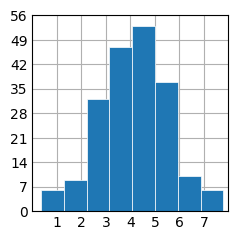

In [101]:
# Histogram

plt.style.use('_mpl-gallery')

# make data
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 56), yticks=np.linspace(0, 56, 9))

plt.show()

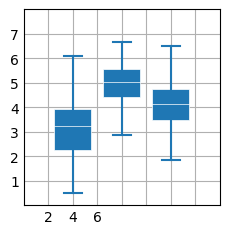

In [102]:
# Boxplot

plt.style.use('_mpl-gallery')

# make data:
np.random.seed(10)
D = np.random.normal((3, 5, 4), (1.25, 1.00, 1.25), (100, 3))

# plot
fig, ax = plt.subplots()
VP = ax.boxplot(D, positions=[2, 4, 6], widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

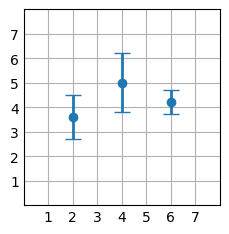

In [103]:
# Error Bar

plt.style.use('_mpl-gallery')

# make data:
np.random.seed(1)
x = [2, 4, 6]
y = [3.6, 5, 4.2]
yerr = [0.9, 1.2, 0.5]

# plot:
fig, ax = plt.subplots()

ax.errorbar(x, y, yerr, fmt='o', linewidth=2, capsize=6)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

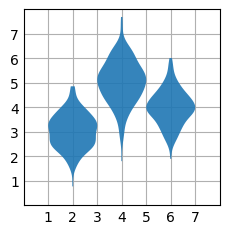

In [104]:
# Violin Plot

plt.style.use('_mpl-gallery')

# make data:
np.random.seed(10)
D = np.random.normal((3, 5, 4), (0.75, 1.00, 0.75), (200, 3))

# plot:
fig, ax = plt.subplots()

vp = ax.violinplot(D, [2, 4, 6], widths=2,
                   showmeans=False, showmedians=False, showextrema=False)
# styling:
for body in vp['bodies']:
    body.set_alpha(0.9)
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

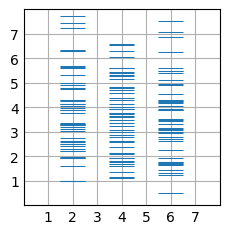

In [105]:
# Event Plot

plt.style.use('_mpl-gallery')

# make data:
np.random.seed(1)
x = [2, 4, 6]
D = np.random.gamma(4, size=(3, 50))

# plot:
fig, ax = plt.subplots()

ax.eventplot(D, orientation="vertical", lineoffsets=x, linewidth=0.75)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

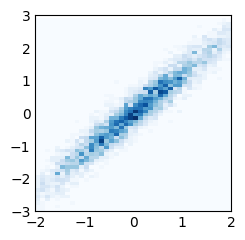

In [106]:
# 2d Histogram

plt.style.use('_mpl-gallery-nogrid')

# make data: correlated + noise
np.random.seed(1)
x = np.random.randn(5000)
y = 1.2 * x + np.random.randn(5000) / 3

# plot:
fig, ax = plt.subplots()

ax.hist2d(x, y, bins=(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1)))

ax.set(xlim=(-2, 2), ylim=(-3, 3))

plt.show()

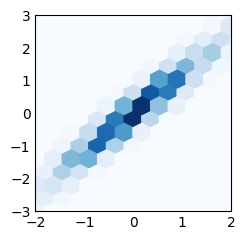

In [107]:
# Hexbin Plot

plt.style.use('_mpl-gallery-nogrid')

# make data: correlated + noise
np.random.seed(1)
x = np.random.randn(5000)
y = 1.2 * x + np.random.randn(5000) / 3

# plot:
fig, ax = plt.subplots()

ax.hexbin(x, y, gridsize=20)

ax.set(xlim=(-2, 2), ylim=(-3, 3))

plt.show()

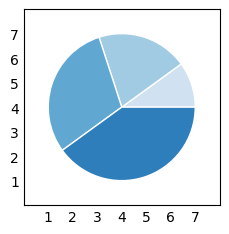

In [108]:
# Pie chart

plt.style.use('_mpl-gallery-nogrid')


# make data
x = [1, 2, 3, 4]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

#### Matplotlib Unstructured Coordinates

#### Matplotlib 3D Plots

## **Plotly**

[Back to contents](#table-of-contents)

### Plotly Installation

### Plotly Usage